For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.
3. First look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the _PE8_ (snake case).
5. Change effective to date column to datetime format.
6. Check `NaN` values per column.
7. Define a function that differentiates between continuous and discrete variables. **Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. **Hint**: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.
10. What should we do with the `customer_id` column?

**1. Import the necessary libraries.**

In [155]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

**2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.**

In [156]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

**3. First look at its main features (`head`, `shape`, `info`).**

In [157]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [158]:
customer_df.shape

(9134, 24)

In [159]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

**4. Rename the columns so they follow the _PE8_ (snake case).**

In [160]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [161]:
customer_df.columns=['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']

In [162]:
customer_df=customer_df[['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size','Total Claim Amount']]

In [163]:
customer_df.columns = map(str.lower, customer_df.columns)

In [168]:
customer_df.head()

,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,total claim amount
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


Setting Customer ID as index

In [166]:
customer_df=customer_df.set_index(customer_df.customer)
customer_df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,total claim amount
customer,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
QZ44356,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
AI49188,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
WW63253,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
HB64268,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


In [167]:
customer_df=customer_df.drop("customer", axis=1)
customer_df.head()

,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,total claim amount
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,384.811147
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1131.464935
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,566.472247
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,529.881344
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,138.130879


**5. Change effective to date column to datetime format.**

In [169]:
customer_df["effective to date"]=pd.to_datetime(customer_df["effective to date"])

In [170]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer lifetime value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective to date              9134 non-null   datetime64[ns]
 6   employment status              9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location code                  9134 non-null   object        
 10  marital status                 9134 non-null   object        
 11  monthly premi

**6. Check `NaN` values per column.**

In [171]:
round(customer_df.isnull().sum()/len(customer_df),10)*100

state                            0.0
customer lifetime value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective to date                0.0
employment status                0.0
gender                           0.0
income                           0.0
location code                    0.0
marital status                   0.0
monthly premium auto             0.0
months since last claim          0.0
months since policy inception    0.0
number of open complaints        0.0
number of policies               0.0
policy type                      0.0
policy                           0.0
renew offer type                 0.0
sales channel                    0.0
vehicle class                    0.0
vehicle size                     0.0
total claim amount               0.0
dtype: float64

**7. Define a function that differentiates between continuous and discrete variables.**

**Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.

In [172]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer lifetime value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective to date              9134 non-null   datetime64[ns]
 6   employment status              9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location code                  9134 non-null   object        
 10  marital status                 9134 non-null   object        
 11  monthly premi

In [173]:
df_num=customer_df.select_dtypes("number")

In [174]:
df_num.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [175]:
df_num.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

column:  customer lifetime value


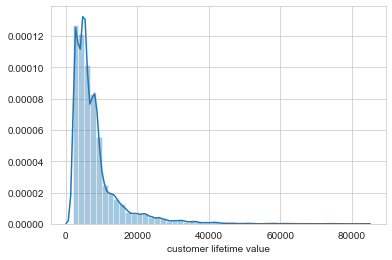

column:  income


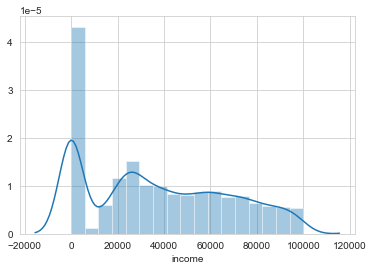

column:  monthly premium auto


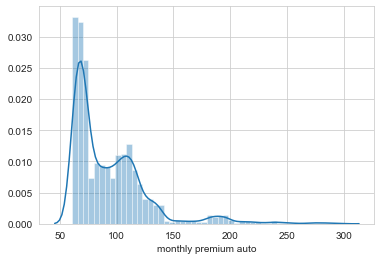

column:  months since last claim


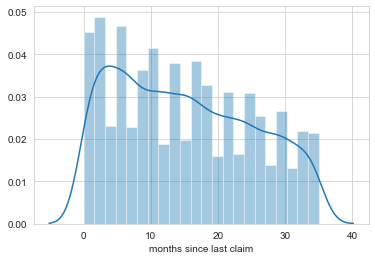

column:  months since policy inception


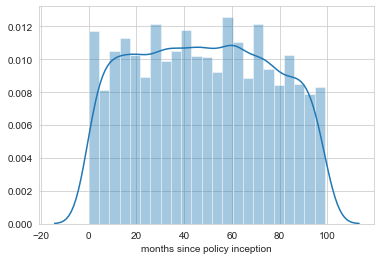

column:  number of open complaints


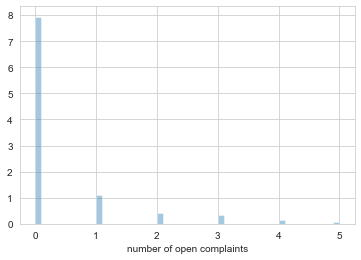

column:  number of policies


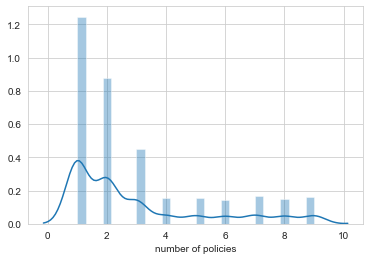

column:  total claim amount


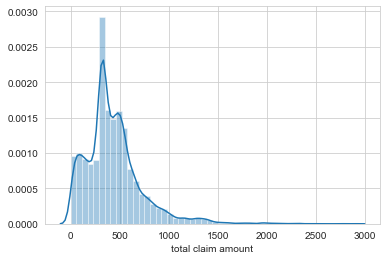

In [177]:
#Looking at the distribution of the numerical columns to get an idea of which ones could be discrete and which ones could be continuous
cols=['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount']
for col in cols:
    print("column: ", col)
    sns.distplot(df_num[col])
    plt.show()

**From looking at the distributions above, I will determine which variables to be continuous and discrete**

In [21]:
for i in cols:
    nber_unique=df_num.nunique()
print(nber_unique)

customer lifetime value          8041
income                           5694
monthly premium auto              202
months since last claim            36
months since policy inception     100
number of open complaints           6
number of policies                  9
total claim amount               5106
dtype: int64


In [22]:
df_num.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [108]:
def discrete_continuous(x):
    cols = list(x)
    list_continuous = []
    list_discrete = []

    for i in cols:
        if df_num[i].nunique()>200:
            list_continuous.append(i)
        else:
            list_discrete.append(i)

In [178]:
discrete_continuous(df_num)

In [195]:
list_continuous

['customer lifetime value',
 'income',
 'monthly premium auto',
 'total claim amount']

In [196]:
list_discrete.append("effective to date")

In [197]:
list_discrete

['months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'effective to date']

In [198]:
df_continuous=customer_df[list_continuous]
df_discrete=customer_df[list_discrete]

In [199]:
df_continuous.head()

,customer lifetime value,income,monthly premium auto,total claim amount
customer,,,,
BU79786,2763.519279,56274,69,384.811147
QZ44356,6979.535903,0,94,1131.464935
AI49188,12887.431650,48767,108,566.472247
WW63253,7645.861827,0,106,529.881344
HB64268,2813.692575,43836,73,138.130879


In [200]:
df_discrete.head()

,months since last claim,months since policy inception,number of open complaints,number of policies,effective to date
customer,,,,,
BU79786,32,5,0,1,2011-02-24
QZ44356,13,42,0,8,2011-01-31
AI49188,18,38,0,2,2011-02-19
WW63253,18,65,0,7,2011-01-20
HB64268,12,44,0,1,2011-02-03


In [201]:
df_cat=customer_df.select_dtypes("object")
df_cat.head()

,state,response,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


(array([911., 933., 926., 950., 855., 948., 891., 901., 891., 928.]),
 array([734138. , 734143.8, 734149.6, 734155.4, 734161.2, 734167. ,
        734172.8, 734178.6, 734184.4, 734190.2, 734196. ]),
 <a list of 10 Patch objects>)

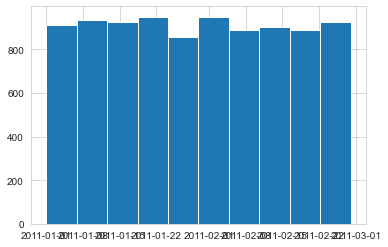

In [202]:
plt.hist(customer_df["effective to date"])

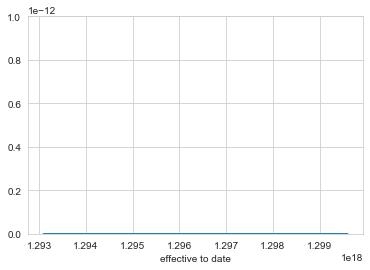

In [203]:
sns.distplot(customer_df["effective to date"])

Although date type columns should be continuous, here, the "effective to date" column seems to be more discrete than continuous in this case.

**8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it.**

**Hint**: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [204]:
cat_cols=list(df_cat)

In [205]:
for col in cat_cols:
    unique_values=df_cat[col].unique()
    print(col,unique_values)

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employment status ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location code ['Suburban' 'Rural' 'Urban']
marital status ['Married' 'Single' 'Divorced']
policy type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew offer type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle size ['Medsize' 'Small' 'Large']


It does not seem like there are any text that we need to clean in the categorical variables 

**9. Get categorical features.**

In [206]:
df_cat.head()

,state,response,coverage,education,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [207]:
list_cat=list(df_cat)

Column:  state


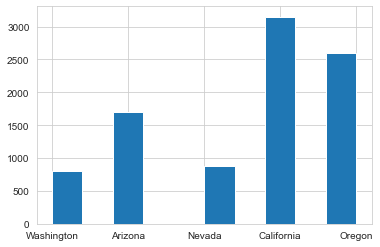

Column:  response


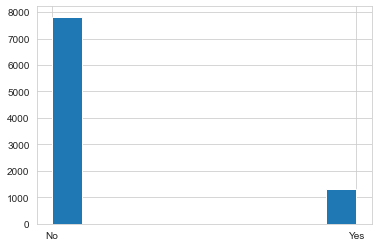

Column:  coverage


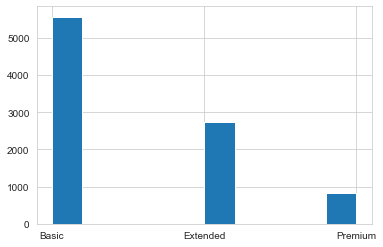

Column:  education


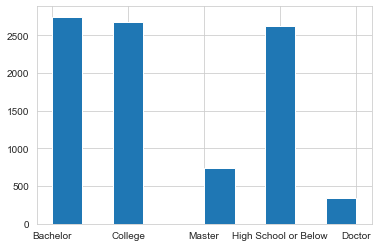

Column:  employment status


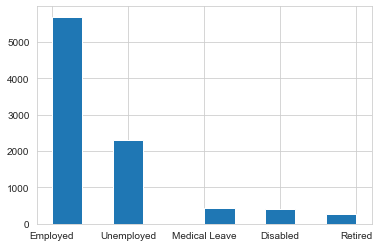

Column:  gender


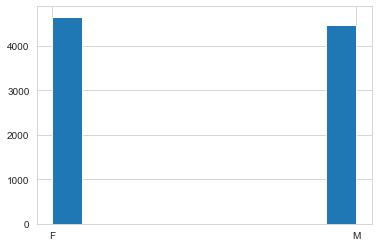

Column:  location code


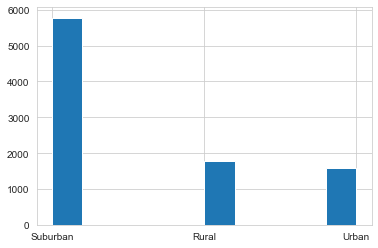

Column:  marital status


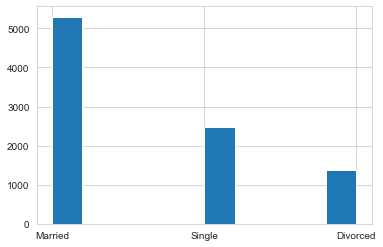

Column:  policy type


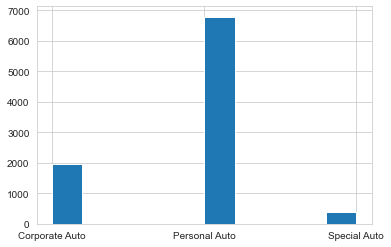

Column:  policy


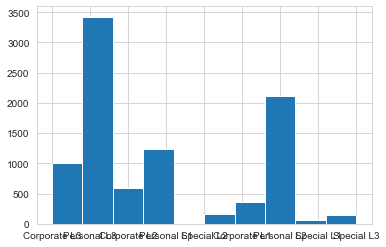

Column:  renew offer type


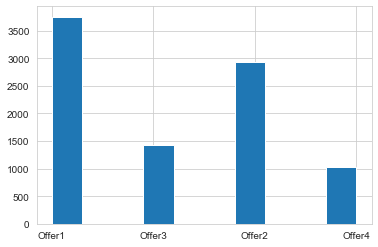

Column:  sales channel


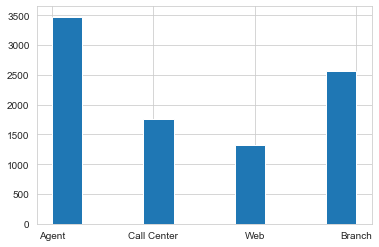

Column:  vehicle class


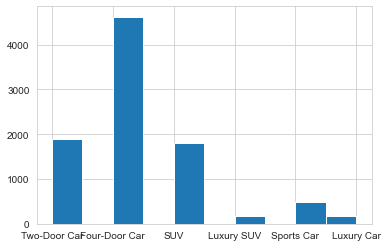

Column:  vehicle size


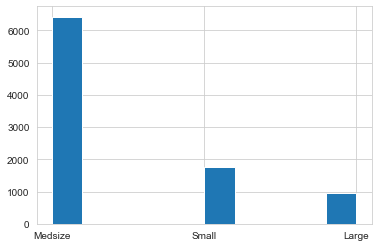

In [208]:
for col in cat_cols:
    plt.hist(df_cat[col])
    print("Column: ",col)
    plt.show()

**10. What should we do with the `customer_id` column?**

Set it as index (already done)

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.

### Instructions

1. Import the necessary libraries if you are starting a new notebook.
2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.
3. Plot a correlation matrix, what can you see?
4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
5. What can you see in the plots?
6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
7. Have you found outliers? If you have, what should we do with them?
8. Check nan values per column.
9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
11. Get categorical features.
12. What should we do with the customer id column?

**3. Plot a correlation matrix, what can you see?**

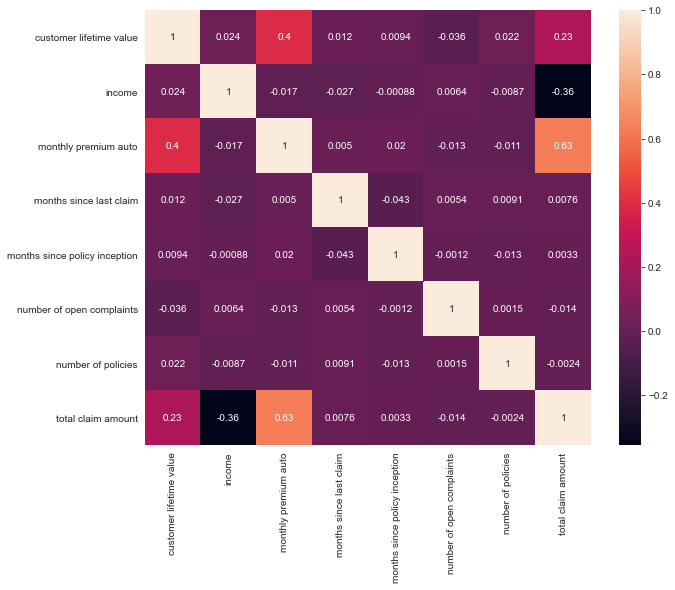

In [209]:
corr_matrix=customer_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

We can see from the correlation matrix that there is multicolinearity between the variable "monthly premium auto" and the variable "customer lifetime value". As "monthly premium auto" is more correlated with our target value "total claim amount", we should consider dropping "customer lifetime value" later on. 

In [211]:
df_continuous.corr()

,customer lifetime value,income,monthly premium auto,total claim amount
customer lifetime value,1.000000,0.024366,0.396262,0.226451
income,0.024366,1.000000,-0.016665,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.632017
total claim amount,0.226451,-0.355254,0.632017,1.000000


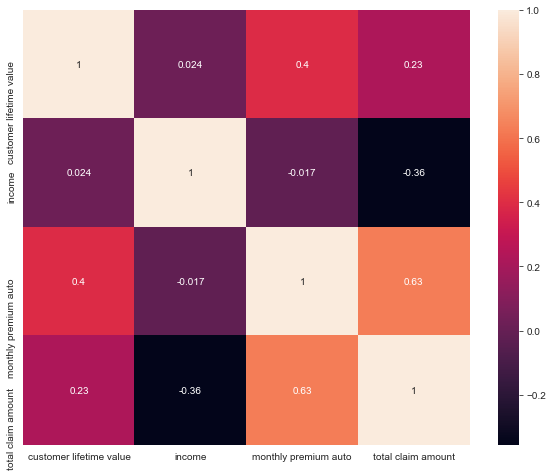

In [212]:
corr_matrix=df_continuous.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [213]:
df_discrete.corr()

,months since last claim,months since policy inception,number of open complaints,number of policies
months since last claim,1.000000,-0.042959,0.005354,0.009136
months since policy inception,-0.042959,1.000000,-0.001158,-0.013333
number of open complaints,0.005354,-0.001158,1.000000,0.001498
number of policies,0.009136,-0.013333,0.001498,1.000000


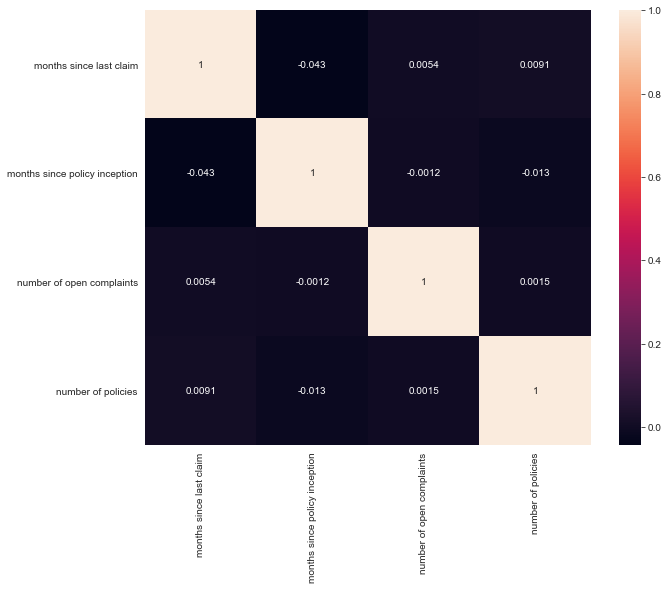

In [214]:
corr_matrix=df_discrete.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

**4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).**

In [215]:
def discrete_plot(x):
    list_discrete=list(x)
    for col in list_discrete:
        plt.hist(df_discrete[col])
        print("Column: ",col)
        plt.show()

Column:  months since last claim


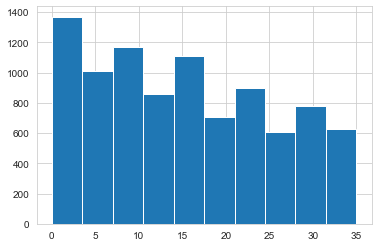

Column:  months since policy inception


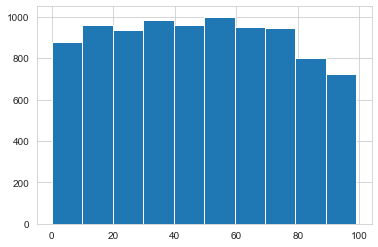

Column:  number of open complaints


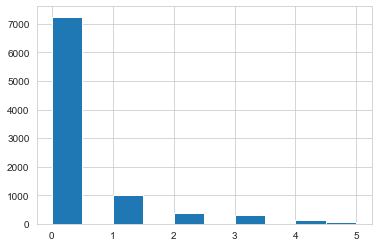

Column:  number of policies


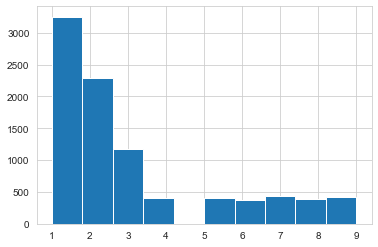

Column:  effective to date


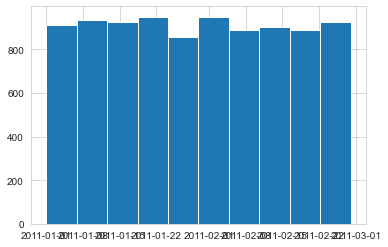

In [216]:
discrete_plot(df_discrete)

Column:  state


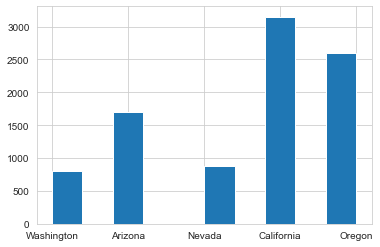

Column:  response


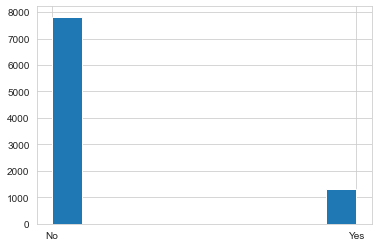

Column:  coverage


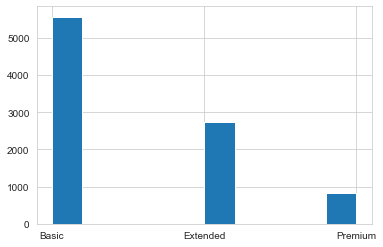

Column:  education


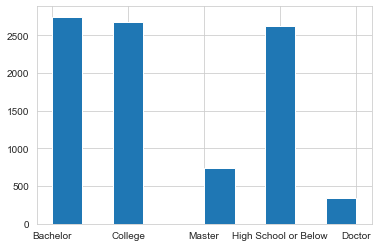

Column:  employment status


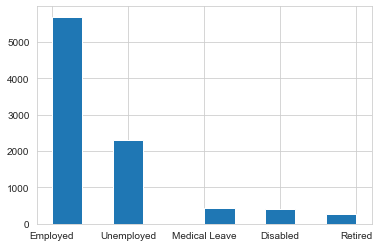

Column:  gender


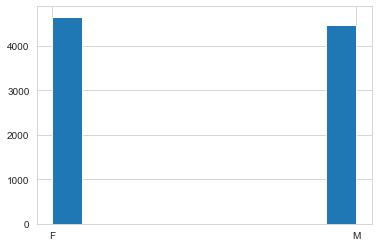

Column:  location code


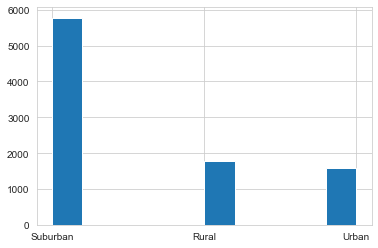

Column:  marital status


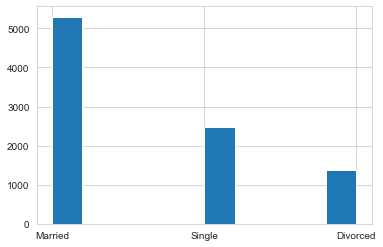

Column:  policy type


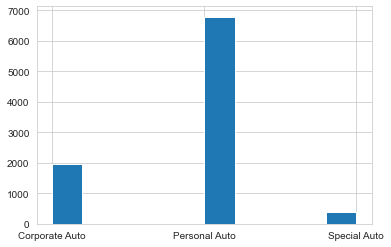

Column:  policy


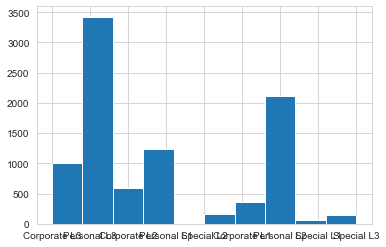

Column:  renew offer type


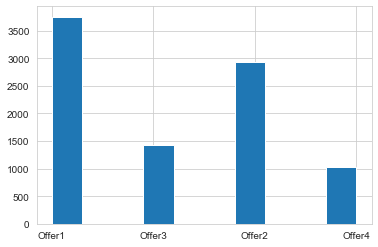

Column:  sales channel


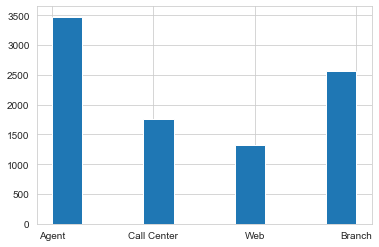

Column:  vehicle class


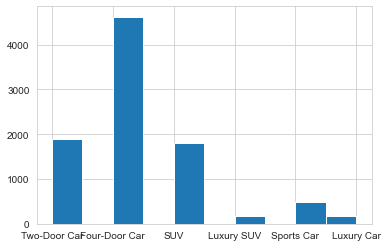

Column:  vehicle size


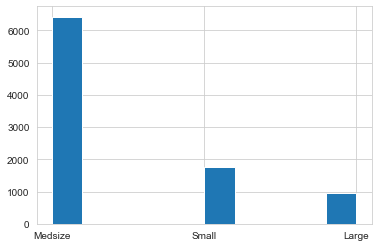

In [217]:
list_cat=list(df_cat)
for col in list_cat:
    plt.hist(df_cat[col])
    print("Column: ",col)
    plt.show()

Column:  customer lifetime value


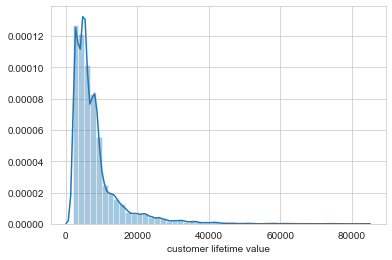

Column:  income


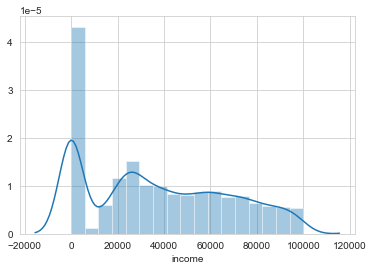

Column:  monthly premium auto


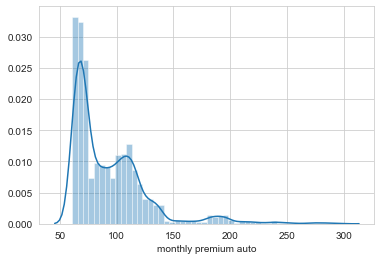

Column:  total claim amount


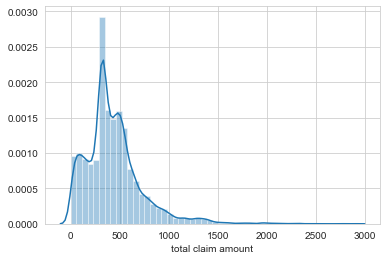

In [218]:
list_continuous=list(df_continuous)
for col in list_continuous:
    sns.distplot(df_continuous[col])
    print("Column: ",col)
    plt.show()

In [219]:
def plots(x,discrete=list_discrete,continuous=list_continuous,cat=list_cat):
    if x in discrete and (x not in cat) and (x not in continuous):
        return plt.hist(df_discrete[x])
    elif x in cat and (x not in discrete) and (x not in continuous):
        return plt.hist(df_cat[x])
    else:
        return sns.distplot(df_continuous[x])

Column:  state


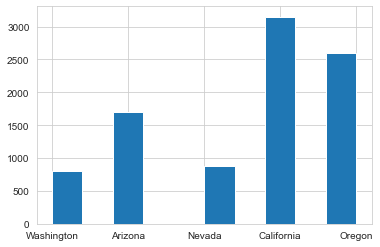

Column:  customer lifetime value


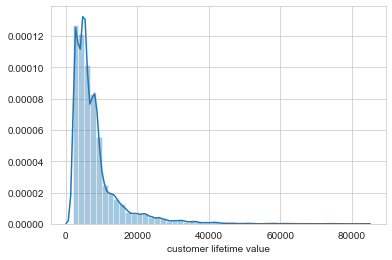

Column:  response


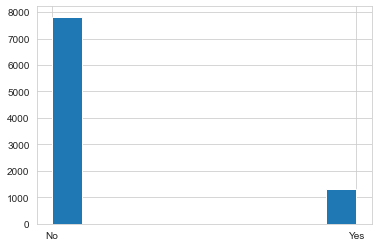

Column:  coverage


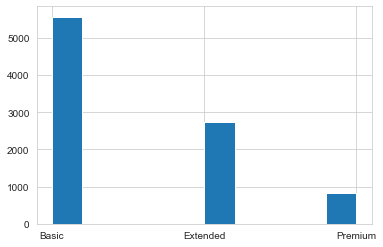

Column:  education


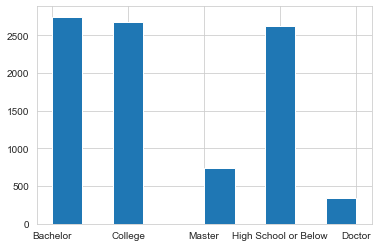

Column:  employment status


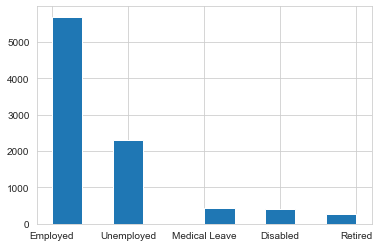

Column:  gender


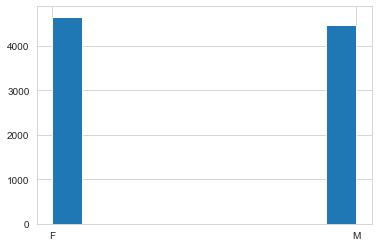

Column:  income


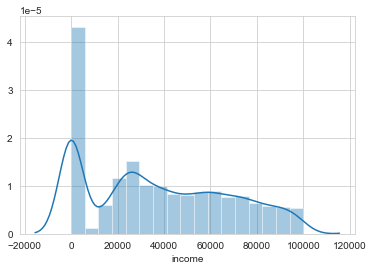

Column:  location code


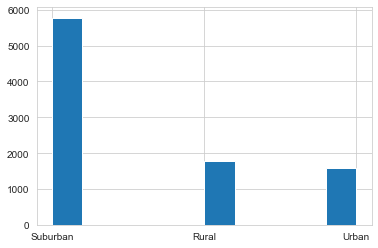

Column:  marital status


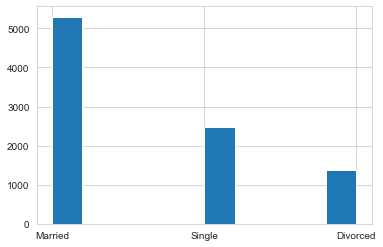

Column:  monthly premium auto


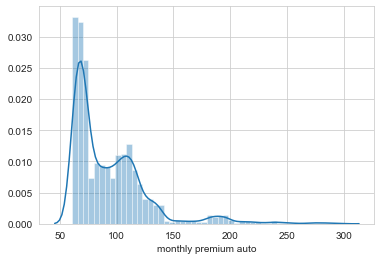

Column:  months since last claim


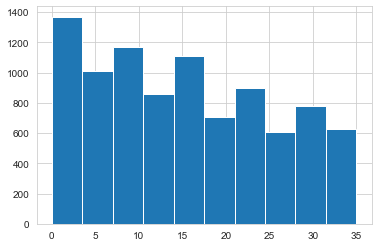

Column:  months since policy inception


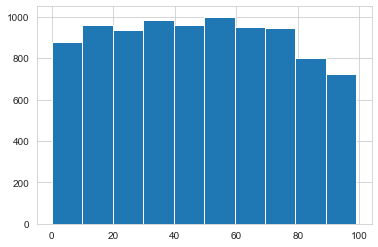

Column:  number of open complaints


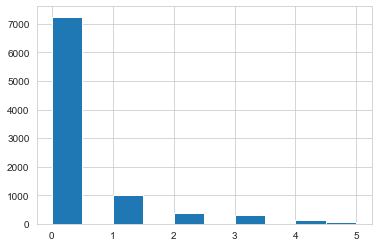

Column:  number of policies


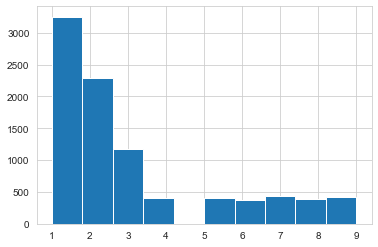

Column:  policy type


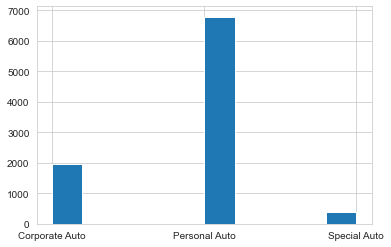

Column:  policy


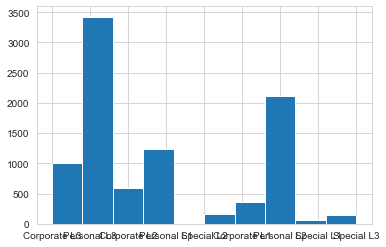

Column:  renew offer type


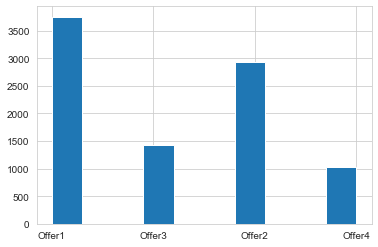

Column:  sales channel


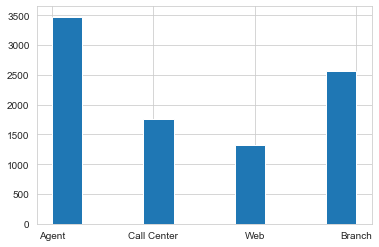

Column:  vehicle class


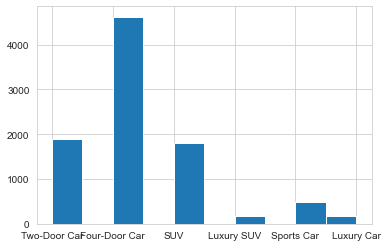

Column:  vehicle size


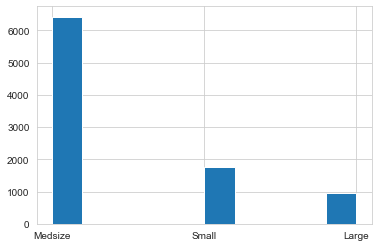

Column:  total claim amount


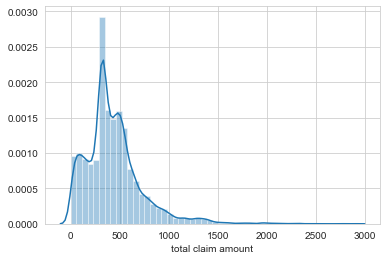

In [220]:
columns=(customer_df.drop("effective to date", axis=1))
for col in columns:
    plots(col)
    print("Column: ",col)
    plt.show()

**6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.**

Column:  customer lifetime value


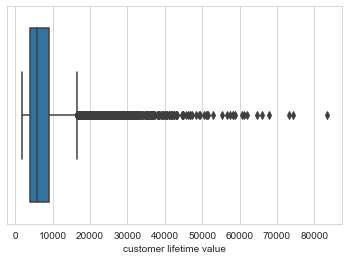

Column:  income


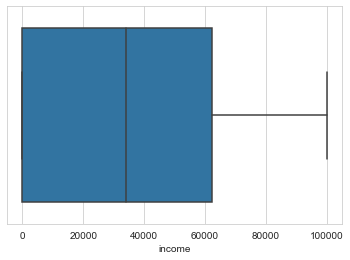

Column:  monthly premium auto


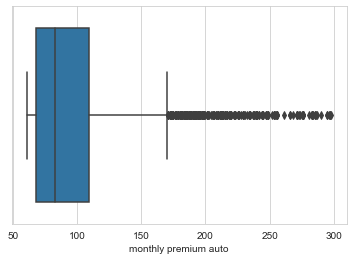

Column:  total claim amount


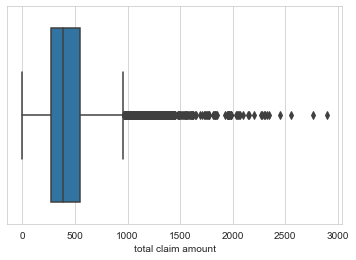

In [42]:
list_continuous=list(df_continuous)
for col in list_continuous:
    sns.boxplot(df_continuous[col])
    print("Column: ",col)
    plt.show()

**7. Have you found outliers? If you have, what should we do with them?**

In [223]:
#Finding outliers in continuous variables
def outliers(x):
    iqr = np.percentile(df_continuous[x],75) - np.percentile(df_continuous[x],25)
    upper_limit = np.percentile(df_continuous[x],75) + 1.5*iqr
    lower_limit = np.percentile(df_continuous[x],25) - 1.5*iqr
    print("The upper wisker is at: %4.2f" % upper_limit)
    print("The lower wisker is at: %4.2f" % lower_limit)
    outliers_upper = df_continuous[df_continuous[x] > upper_limit].index.tolist()
    outliers_lower = df_continuous[lower_limit > df_continuous[x]].index.tolist()
    print("The number of points outside the upper wisker is: ",len(outliers_upper))
    print("The number of points outside the lower wisker is: ",len(outliers_lower))

In [226]:
for i in list_continuous:
    print("Column: ", i)
    outliers(i)
    print(
    )

Column:  customer lifetime value
The upper wisker is at: 16414.04
The lower wisker is at: -3457.62
The number of points outside the upper wisker is:  817
The number of points outside the lower wisker is:  0

Column:  income
The upper wisker is at: 155800.00
The lower wisker is at: -93480.00
The number of points outside the upper wisker is:  0
The number of points outside the lower wisker is:  0

Column:  monthly premium auto
The upper wisker is at: 170.50
The lower wisker is at: 6.50
The number of points outside the upper wisker is:  430
The number of points outside the lower wisker is:  0

Column:  total claim amount
The upper wisker is at: 960.40
The lower wisker is at: -140.63
The number of points outside the upper wisker is:  453
The number of points outside the lower wisker is:  0



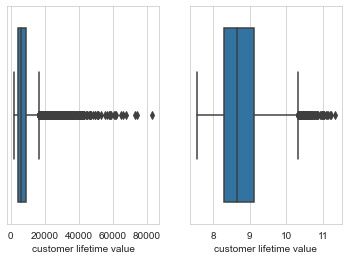

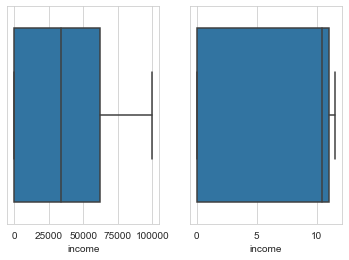

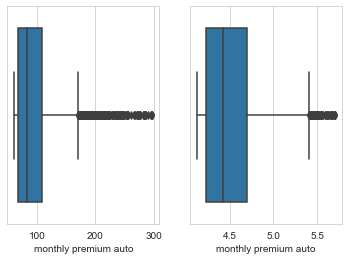

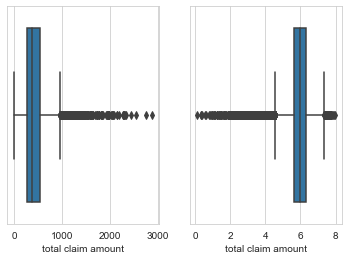

In [236]:
#Option 1: Apply log function
for i in list_continuous:
    fig,axes=plt.subplots(1,2)
    sns.boxplot(df_continuous[i], ax=axes[0])
    sns.boxplot(np.log(df_continuous[i]+1), ax=axes[1])

The boxplots on the right show what the distribution of the columns would look like after log transformation

In [237]:
#Option 2: Filtering outliers out
def dist(x):
    iqr = np.percentile(df_continuous[x],75) - np.percentile(df_continuous[x],25)
    upper_limit = np.percentile(df_continuous[x],75) + 1.5*iqr
    lower_limit = np.percentile(df_continuous[x],25) - 1.5*iqr
    print("The upper wisker is at: %4.2f" % upper_limit)
    print("The lower wisker is at: %4.2f" % lower_limit)
    outliers_upper = df_continuous[df_continuous[x] > upper_limit].index.tolist()
    outliers_lower = df_continuous[lower_limit > df_continuous[x]].index.tolist()
    print("The number of points outside the upper wisker is: ",len(outliers_upper))
    print("The number of points outside the lower wisker is: ",len(outliers_lower))
    
    dta_continuous = df_continuous[df_continuous[x] < upper_limit]
    sns.boxplot(dta_continuous[x])
    plt.show()

The upper wisker is at: 16414.04
The lower wisker is at: -3457.62
The number of points outside the upper wisker is:  817
The number of points outside the lower wisker is:  0


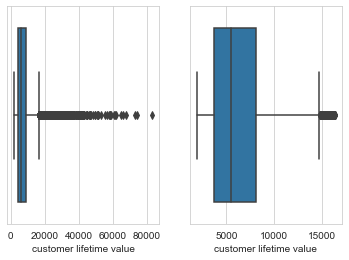

The upper wisker is at: 155800.00
The lower wisker is at: -93480.00
The number of points outside the upper wisker is:  0
The number of points outside the lower wisker is:  0


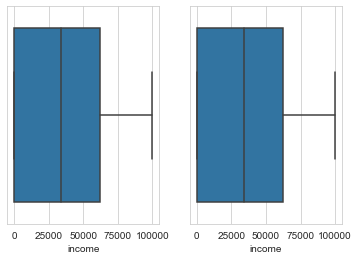

The upper wisker is at: 170.50
The lower wisker is at: 6.50
The number of points outside the upper wisker is:  430
The number of points outside the lower wisker is:  0


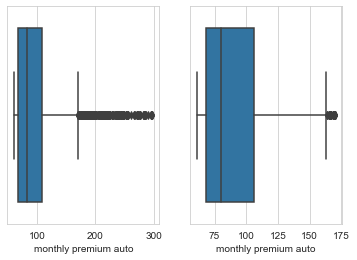

The upper wisker is at: 960.40
The lower wisker is at: -140.63
The number of points outside the upper wisker is:  453
The number of points outside the lower wisker is:  0


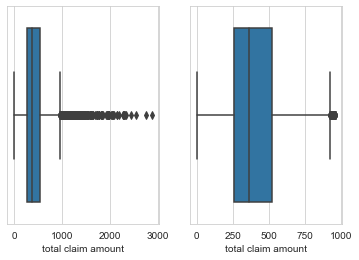

In [127]:
list_continuous
for i in list_continuous:
    fig,axes=plt.subplots(1,2)
    sns.boxplot(df_continuous[i], ax=axes[0])
    dist(i)

8. Check nan values per column.
9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
11. Get categorical features.
12. What should we do with the customer id column?

**Already done before!!**